In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# import keras


from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.layers import Flatten          
from keras.layers import Dropout
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random

import matplotlib.image as mpimg

Using TensorFlow backend.


In [ ]:
np.random.seed(0)     #With the seed reset (every time), the same set of numbers will appear every time.

                      #If the random seed is not reset, different numbers appear with every invocation

In [ ]:
data=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
type(data)

tuple

In [ ]:
len(data)

2

In [ ]:
data[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [ ]:
len(data[0])

2

In [ ]:
(x_train,y_train),(x_test,y_test)=data

In [ ]:
len(x_test)==len(y_test)

True

In [ ]:
x_train[0].shape

(28, 28)

0

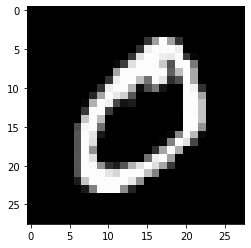

In [ ]:
plt.imshow(x_train[1],cmap='gray')
y_train[1]

In [ ]:
print(len(y_train[y_train==4]))

5842


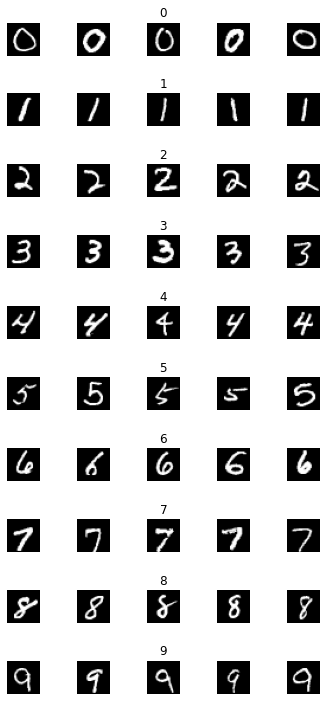

In [ ]:
num_of_samples=[]
cols=5
num_classes=10

fig,axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,10))
fig.tight_layout()


for i in range(cols):
  for j in range(num_classes):                                    # Here we are trying to find the no of occurences of each no 
    x_selected=x_train[y_train==j]                                #  from 1 to 9
    #axs[j][i].imshow(x_selected[0])
    var=random.randint(0,len(x_selected)-1)
    axs[j][i].imshow(x_selected[var],cmap='gray')
    
    axs[j][i].axis("off")
    
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


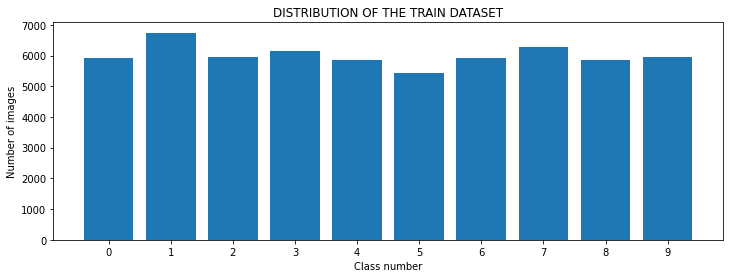

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("DISTRIBUTION OF THE TRAIN DATASET")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.xticks(np.arange(0,10))
plt.show()

In [ ]:
# MODEL TAKES SHAPE -1,28,28,1

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
y_train=to_categorical(y_train,10)

In [ ]:
x_train=x_train/255
#y_train=y_train/255
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [ ]:
x_test=x_test/255
#y_test=y_test/255


In [ ]:
def le_net():
  model=Sequential()
  model.add(Conv2D(30,(5,5),input_shape=(28,28,1),activation='relu'))    # kernel to glide over image
  model.add(MaxPooling2D(pool_size=(2,2)))                               # ( to minimze the size as (2,2) therfore half the 
  model.add(Conv2D(15,(3,3),activation='relu'))                          #    original size )
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dense(num_classes,activation='softmax'))
  #model.add(Dropout(0.5))                                         #Dropout is used to remove unwanted weights and bias
  #model.add(Dropout(0.5))
  
  
  model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
lenet=le_net()
lenet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [ ]:
history=lenet.fit(x_train,
                 y_train,
                 epochs=8,                                  # no of iterations
                 validation_split=0.1,
                 batch_size=400,
                 verbose=1,shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/8
54000/54000 [==============================] - 7s 130us/step - loss: 0.4210 - accuracy: 0.8901 - val_loss: 0.0896 - val_accuracy: 0.9762
Epoch 2/8
54000/54000 [==============================] - 1s 16us/step - loss: 0.0921 - accuracy: 0.9731 - val_loss: 0.0596 - val_accuracy: 0.9832
Epoch 3/8
54000/54000 [==============================] - 1s 16us/step - loss: 0.0630 - accuracy: 0.9807 - val_loss: 0.0572 - val_accuracy: 0.9830
Epoch 4/8
54000/54000 [==============================] - 1s 16us/step - loss: 0.0499 - accuracy: 0.9844 - val_loss: 0.0464 - val_accuracy: 0.9862
Epoch 5/8
54000/54000 [==============================] - 1s 17us/step - loss: 0.0410 - accuracy: 0.9876 - val_loss: 0.0415 - val_accuracy: 0.9890
Epoch 6/8
54000/54000 [==============================] - 1s 16us/step - loss: 0.0327 - accuracy: 0.9896 - val_loss: 0.0456 - val_accuracy: 0.9868
Epoch 7/8
54000/54000 [==============================] - 1s 16us/step - lo

Text(0.5, 0, "['epoch']")

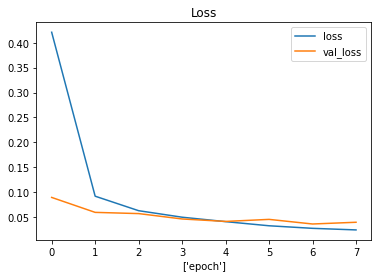

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])                  # to give name to each of the line 
plt.title('Loss')
plt.xlabel(['epoch'])




In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])  
plt.title('Acc')
plt.xlabel(['epoch'])




KeyError: ignored

In [ ]:
# import requests 
# from PIL import Image
# import io
# import cv2 as cv
# import numpy as np

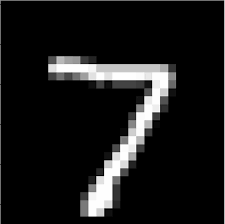

In [ ]:
import requests
import io
from PIL import Image
import matplotlib.pyplot as plt
import cv2 as cv
data=requests.get("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRrBl7VFXyeDz5T9iQ1pHugFl04jLPm3kTVr7wueLe1xK2lnYRn",stream=True).content
data=io.BytesIO(data)
data=Image.open(data).convert("L")
data

In [ ]:
data=np.array(data)
data=cv.resize(data,(28,28))
data=data.reshape(1,28,28,1)
data=data/255


In [ ]:
lenet.predict_classes(data)

array([7])